In [ ]:
# === 0. Setup & Upload File in Colab ===
from google.colab import files
uploaded = files.upload()


Saving Concrete_Data.csv to Concrete_Data.csv


In [ ]:
# Auto-load the uploaded file
import pandas as pd
filename = list(uploaded.keys())[0]
print(f"Using uploaded file: {filename}")

Using uploaded file: Concrete_Data.csv


In [ ]:
# === 1. Load the Data ===
df = pd.read_csv(filename)
print(f"Loaded {len(df)} rows of data.")

Loaded 1030 rows of data.


In [ ]:
# === 2. Explore the Data ===
print("\n Dataset Overview:")
print(df.head())
print("\nInfo:")
print(df.info())
print("\n Missing Values:\n", df.isnull().sum())
print("\n Summary Statistics:\n", df.describe())

# df.describe() is a method used to generate descriptive statistics of a DataFrame.
#  It provides a summary of the central tendency, dispersion, and shape of the dataset's distribution.

#For numerical data, the output includes:
# count: Number of non-null values.
# mean: Average value.
# std: Standard deviation.
# min: Minimum value.
# 25%: First quartile.
# 50%: Median (second quartile).
# 75%: Third quartile.
# max: Maximum value.


 Dataset Overview:
   Cement (kg in a m^3 )  Blast Furnace Slag (kg in a m^3 mixture)  \
0                  540.0                                       0.0   
1                  540.0                                       0.0   
2                  332.5                                     142.5   
3                  332.5                                     142.5   
4                  198.6                                     132.4   

   Fly Ash (kg in a m^3 mixture)  Water (kg in a m^3 mixture)  \
0                            0.0                        162.0   
1                            0.0                        162.0   
2                            0.0                        228.0   
3                            0.0                        228.0   
4                            0.0                        192.0   

   Superplasticizer (kg in a m^3 mixture)  \
0                                     2.5   
1                                     2.5   
2                                

In [ ]:
# === 3. Prepare Features & Target ===
X = df.iloc[:, :-1]  # All columns except the last
y = df.iloc[:, -1]   # The last column (compressive strength)


In [ ]:
# === 4. Split & Scale the Data ===
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# This code splits the dataset into training and testing sets to evaluate model performance fairly and applies standard scaling to normalize feature values,
# improving model accuracy and consistency.
# It ensures that scaling is based only on training data to avoid data leakage and maintain the integrity of the test set.

In [ ]:
# === 5. Train the Model ===
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [ ]:

# === 6. Evaluate the Model ===
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\n Model Evaluation:")
print(f"MAE (Mean Absolute Error): {mae:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Based on the evaluation metrics, the Random Forest model performs well in predicting the concrete compressive strength.
# The Mean Absolute Error (MAE) of 3.73 indicates that the model's predictions are, on average, within 3.73 MPa of the actual values.
# The Root Mean Squared Error (RMSE) of 5.46 shows that while most predictions are close, a few larger errors exist but are not excessive.
# Most importantly, the R² score of 0.88 means that approximately 88% of the variance in the target variable is explained by the input features,
# which reflects strong predictive performance. Overall, the model is accurate and reliable, and can be a useful tool for concrete strength analysis
# and optimization.



 Model Evaluation:
MAE (Mean Absolute Error): 3.73
RMSE (Root Mean Squared Error): 5.46
R² Score: 0.88


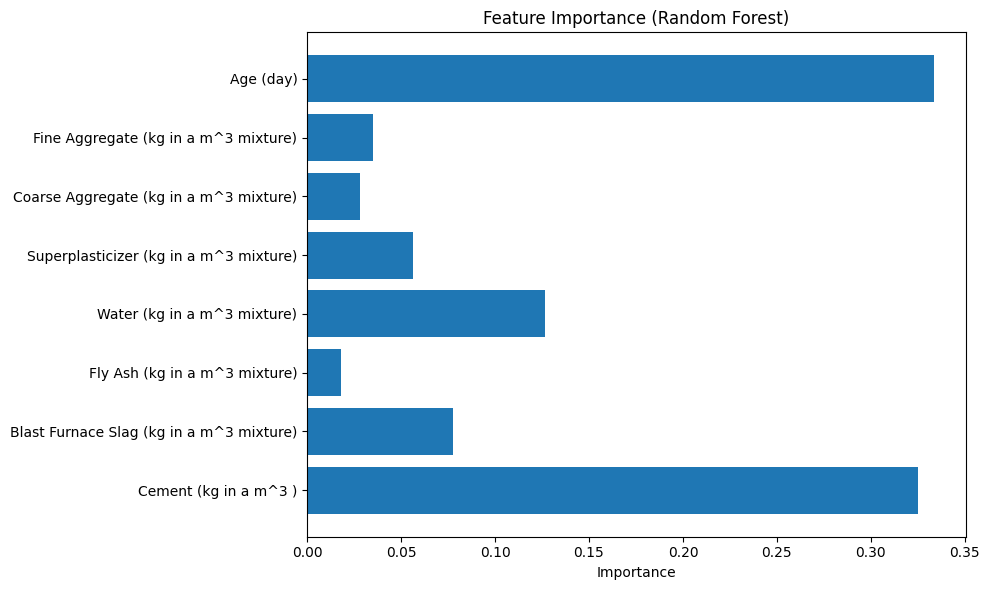

In [ ]:

# === 7. Visualizations ===
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(X.columns, model.feature_importances_)
plt.xlabel("Importance")
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()



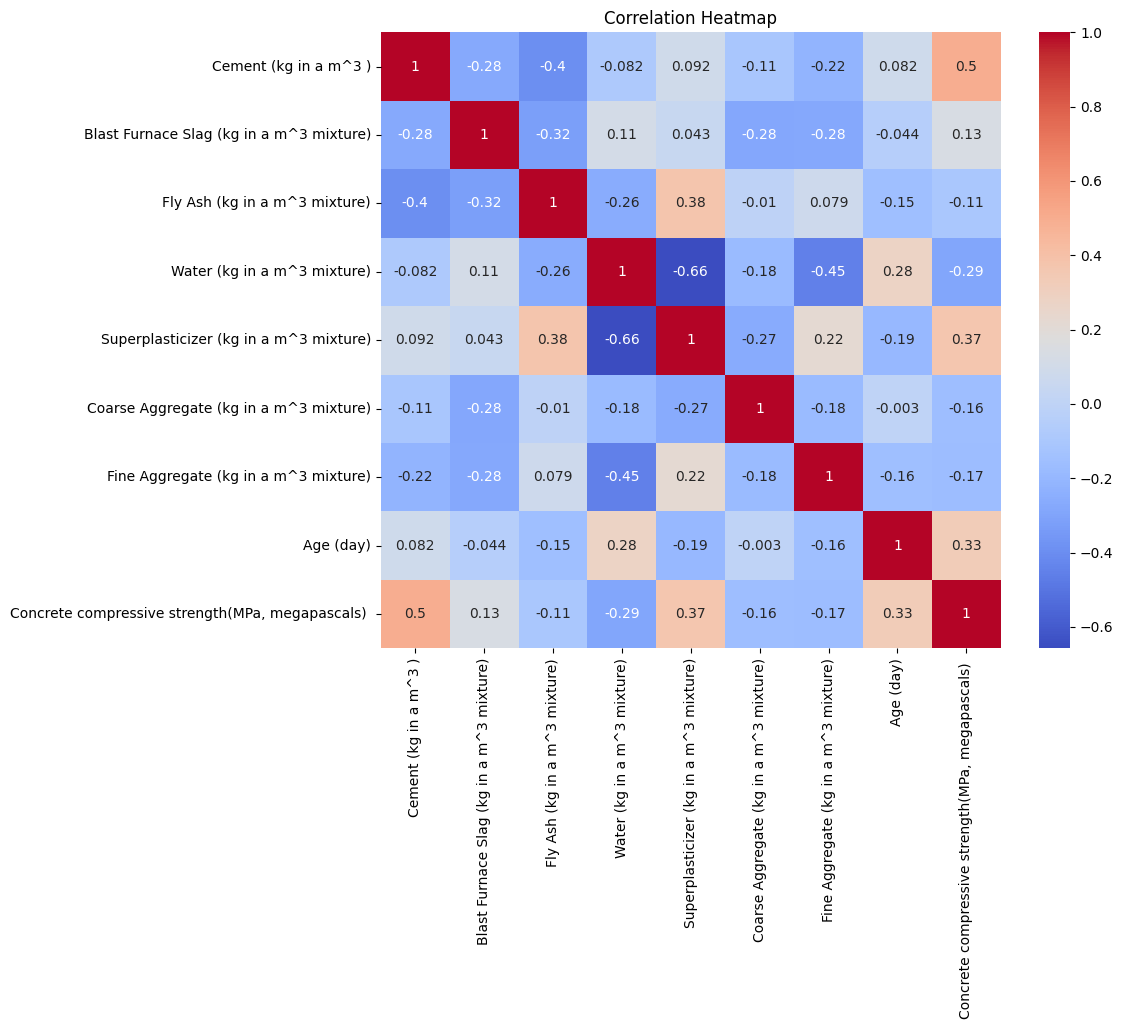

In [ ]:

# 🔹 Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


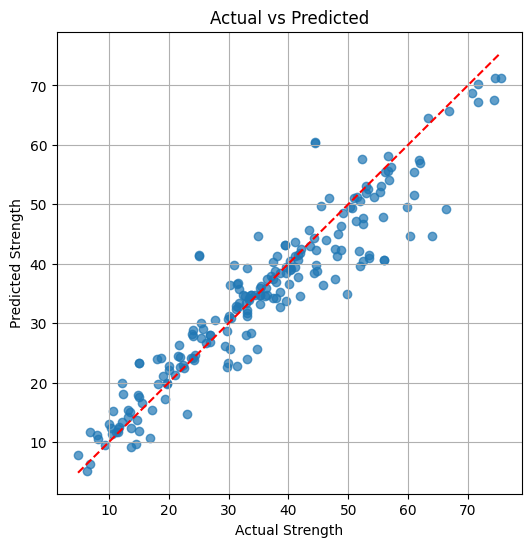

In [ ]:

# Actual vs Predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Strength")
plt.ylabel("Predicted Strength")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.grid(True)
plt.show()


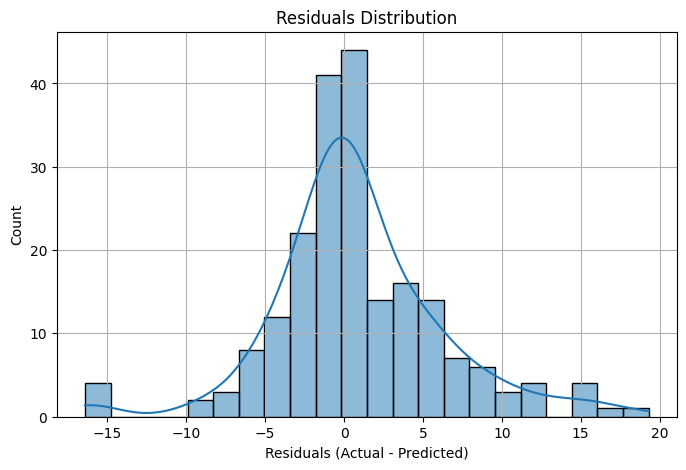

In [ ]:

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residuals (Actual - Predicted)")
plt.grid(True)
plt.show()

In [ ]:
# === 8. Save Model & Scaler for Later Use ===
import joblib
joblib.dump(model, 'concrete_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("Model and scaler saved as 'concrete_model.pkl' and 'scaler.pkl'.")


Model and scaler saved as 'concrete_model.pkl' and 'scaler.pkl'.


In [ ]:

# === 9. Predict on New Input ===
# Example input (same order as dataset features):
new_input = [[540.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]
new_input_scaled = scaler.transform(new_input)
new_prediction = model.predict(new_input_scaled)
print(f"\n Predicted Compressive Strength: {new_prediction[0]:.2f}")


 Predicted Compressive Strength: 35.46


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
